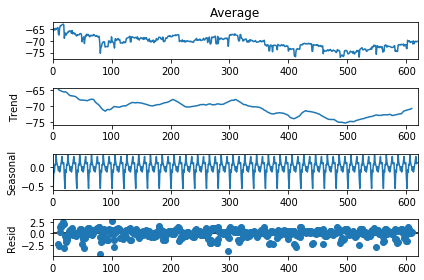

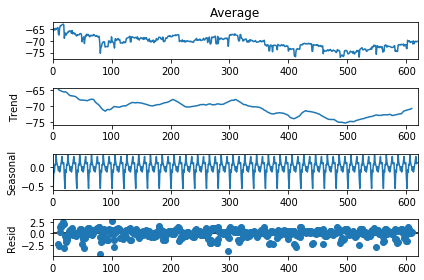

In [56]:
import numpy as np 
import pandas as pd 
from statsmodels.tsa.seasonal import seasonal_decompose 
import matplotlib.pyplot as plt

# Read the AirPassengers dataset 
df = pd.read_csv('Test3_Full_Original.csv',
            delimiter=',', names=['x', 'y', 'Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 'UVIC_Eduroam1', 'UVIC_Eduroam2', 'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'UVIC_Eduroam3', 'localization2', 'localization3_5g', 'UVIC_Eduroam4', 'localization1_5g'])
df = df.loc[:,['x','y','Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g',
       'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'localization2',
       'localization3_5g', 'localization1_5g']]

df['Average'] = (df.Magicv2 + df.localization4 + df.localizationlab + df.Magicv2_5g + df.localization3 + df.localization_lab5g + df.localization1 + df.localization4_5g + df.localization2 + df.localization3_5g + df.localization1_5g)/11
df.head()
  
  
# ETS Decomposition 
result = seasonal_decompose(df['Average'],  
                            model ='additive', period = 20) 
  
# ETS plot  
result.plot() 

In [57]:
# Import the library 
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df['Average'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 2, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 2); AIC=1597.937, BIC=1620.069, Fit time=0.357 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 2); AIC=1920.028, BIC=1928.881, Fit time=0.017 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 2); AIC=1723.917, BIC=1741.623, Fit time=0.115 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 2); AIC=1615.482, BIC=1633.188, Fit time=0.156 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 2); AIC=1593.136, BIC=1619.695, Fit time=0.410 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 0, 2); AIC=1602.330, BIC=1624.462, Fit time=0.535 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 2); AIC=1588.213, BIC=1619.199, Fit time=0.979 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 2, 2); AIC=1595.793, BIC=1622.352, Fit time=0.468 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 2, 2); AIC=1595.956, BIC=1622.515, Fit time=0.529 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_o

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  620
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 2)   Log Likelihood                -787.107
Date:                                Tue, 03 Nov 2020   AIC                           1588.213
Time:                                        12:07:25   BIC                           1619.199
Sample:                                             0   HQIC                          1600.259
                                                - 620                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0025      0.001     -2.693      0.007      -0.004      -0.001
ar.L1         -0.2354      0.046     -5.167      0.000      -0.325      -0.146
ma.L1          0.9037      0.032     27.923      0.000       0.840       0.967
ar.S.L2        0.8984      0.031     29.142      0.000       0.838       0.959
ma.S.L2       -1.2173      0.063    -19.474      0.000      -1.340      -1.095
ma.S.L4        0.2200      0.052      4.259      0.000       0.119       0.321
sigma2         0.7388      0.029     25.757      0.000       0.683       0.795
===================================================================================
Ljung-Box (Q):                       53.03   Jarque-Bera (JB):              1448.50
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -1.22
Prob(H) (two-sided):                  0.02   Kurtosis:                        10.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
# Split data into train / test sets 
train = df['Average'].iloc[:len(df['Average'])-20] 
test = df['Average'].iloc[len(df['Average'])-20:] # set one year(12 months) for testing 
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train,  
                order = (1, 0, 1),  
                seasonal_order =(1, 1, [1,2], 2)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                Average   No. Observations:                  600
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 2)   Log Likelihood                -762.030
Date:                                Tue, 03 Nov 2020   AIC                           1536.060
Time:                                        12:07:25   BIC                           1562.422
Sample:                                             0   HQIC                          1546.324
                                                - 600                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2033      0.052     -3.920      0.000      -0.305      -0.102
ma.L1          0.8669      0.041     21.033      0.000       0.786       0.948
ar.S.L2        0.7869      0.086      9.165      0.000       0.619       0.955
ma.S.L2       -1.1246      0.090    -12.503      0.000      -1.301      -0.948
ma.S.L4        0.1796      0.067      2.697      0.007       0.049       0.310
sigma2         0.7452      0.022     33.780      0.000       0.702       0.788
===================================================================================
Ljung-Box (Q):                       50.42   Jarque-Bera (JB):              1379.47
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -1.33
Prob(H) (two-sided):                  0.02   Kurtosis:                         9.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

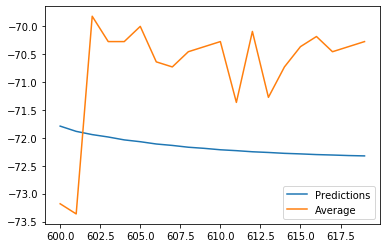

In [59]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test.plot(legend = True) 

In [60]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test, predictions) 
  
# Calculate mean squared error 
mean_squared_error(test, predictions) 


3.0777443823134214

Text(0, 0.5, 'RSSI')

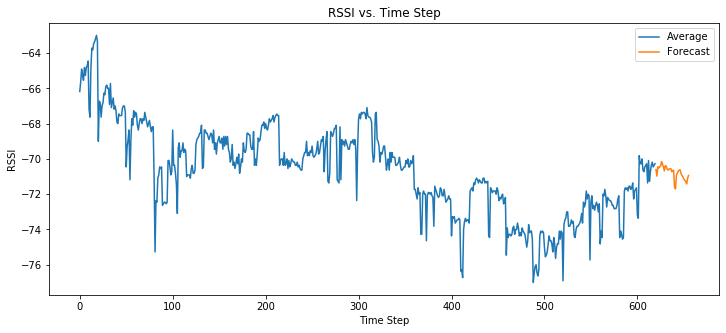

In [61]:

# Train the model on the full dataset 
model = model = SARIMAX(df['Average'],  
                        order = (1, 0, 1),  
                        seasonal_order =(1, 1, [1,2], 20)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(df['Average']),  
                          end = (len(df['Average'])-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df['Average'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 
plt.title('RSSI vs. Time Step')
plt.xlabel('Time Step')
plt.ylabel('RSSI')

In [62]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test, predictions)))

Mean Absolute Error: 1.7178630075265005
Mean Squared Error: 3.0777443823134214
Root Mean Squared Error: 1.7543501310495067


In [63]:
df=pd.DataFrame({'Actual':test, 'Predicted':predictions})
df

,Actual,Predicted
600,-73.181818,-71.788862
601,-73.363636,-71.882991
602,-69.818182,-71.941012
603,-70.272727,-71.983995
604,-70.272727,-72.035920
605,-70.000000,-72.068515
606,-70.636364,-72.109574
607,-70.727273,-72.135228
608,-70.454545,-72.167487
609,-70.363636,-72.187731


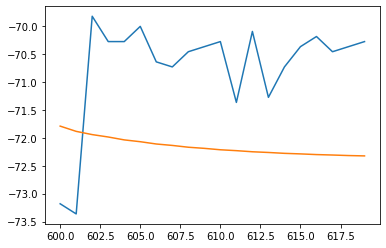

In [64]:
plt.plot(df.Actual.index, df.Actual)
plt.plot(df.Actual.index, df.Predicted)
plt.show()